In [1]:
import argparse
import sys
import os
import json
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import torch
from collections import Counter

/Users/katemarg/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_DIR = "/Users/katemarg/PycharmProjects/temporal_robustness_evaluation"
DATA_DIR = os.path.join(BASE_DIR, 'data')
RES_DIR = os.path.join(BASE_DIR, 'new_results')
MLM_DIR = os.path.join(RES_DIR, 'mlm_scoring')
MLM_DIR_csv = os.path.join(RES_DIR, 'mlm_scoring', 'csv_files')
LOG_DIR = os.path.join(BASE_DIR, 'new_logs')
CACHE_DIR = os.path.join(BASE_DIR, 'cached')

models = [
            'cardiffnlp/twitter-roberta-base-2019-90m',
            'cardiffnlp/twitter-roberta-base-mar2020',
            'cardiffnlp/twitter-roberta-base-jun2020',
            'cardiffnlp/twitter-roberta-base-sep2020',
            'cardiffnlp/twitter-roberta-base-dec2020',
            'cardiffnlp/twitter-roberta-base-mar2021',
            'cardiffnlp/twitter-roberta-base-jun2021',
            'cardiffnlp/twitter-roberta-base-sep2021',
            'cardiffnlp/twitter-roberta-base-dec2021',
            # 'cardiffnlp/twitter-roberta-base-2021-124m',
            'cardiffnlp/twitter-roberta-base-mar2022',
            'cardiffnlp/twitter-roberta-base-jun2022'
        ]

## This notebook analyses the results with the single-token test data.

In [3]:
results_df = pd.DataFrame()
for split in ["unchanged", "updated", "deleted", "new"]:
    for model in models:
        filepath = "{}_dynamic-templama_2019-1-1_to_2022-6-31_per_quarter_mlm_scoring_{}.csv".format(model.split("-")[-1], split)
        file = os.path.join(MLM_DIR_csv,filepath)
        results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))

/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append 

/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(MLM_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_3749/754377553.py:6: FutureWarning: The frame.append 

In [4]:
set(results_df['split'])

{'deleted', 'new', 'unchanged', 'updated'}

In [5]:
# there is a problem with the forst and this is a fix
# scores = results_df["all_pppl_scores"].iloc[0]
# scores = scores.replace("[","").replace("]","")
# score_list = scores.split(',')
# floats = [float(x) for x in score_list]

median_list = []
for i in range(len(results_df)):
    scores = results_df["all_pppl_scores"].iloc[i]
    scores = scores.replace("[","").replace("]","")
    score_list = scores.split(',')
    floats = [float(x) for x in score_list]
    median_list.append(round(np.median(floats),3))
    
results_df['median_pppl'] = median_list

In [ ]:
# round(np.median(floats),3)

In [ ]:
# median_list = []
# for i in range(len(results_df)):
#     scores = results_df["all_pppl_scores"].iloc[i]
#     scores = scores.replace("[","").replace("]","")
#     score_list = scores.split(',')
#     floats = [float(x) for x in score_list]
#     median_list.append(round(np.median(floats),3))

In [6]:
results_df

,Unnamed: 0,model,dataset,quarter,size,split,P@1,P@10,P@20,P@50,...,mrr,avg_f1_micro,avg_f1_macro,avg_rouge,avg_bleu,avg_bleu_uni,avg_bert_score,avg_pppl,all_pppl_scores,median_pppl
0,0,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q2,10854,unchanged,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84167.3063,"[52.282948440674275, 1.3470529149924437, 5.019...",34.883
1,1,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q3,10208,unchanged,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86713.8132,"[52.282948440674275, 1.3470529149924437, 5.019...",33.960
2,2,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q4,10372,unchanged,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73121.0490,"[52.282948440674275, 1.3470529149924437, 5.019...",34.442
3,3,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2020-Q1,10292,unchanged,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85250.8999,"[52.282948440674275, 1.3470529149924437, 5.019...",34.928
4,4,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2020-Q2,10675,unchanged,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85910.1260,"[52.282948440674275, 1.3470529149924437, 5.019...",34.758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,8,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2021-Q2,81,new,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36624.1275,"[183.82496222791374, 1.0609236337203143, 4.609...",21.445
9,9,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2021-Q3,104,new,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34054.8741,"[183.82496222791374, 4.609406964228775, 1.1226...",21.134
10,10,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2021-Q4,94,new,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34020.2238,"[183.82496222791374, 1.1226856610462845, 1.615...",21.314
11,11,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2022-Q1,138,new,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35246.3921,"[183.82496222791374, 60.16298144798813, 1.1226...",21.494


In [7]:
# results_df = pd.read_csv(os.path.join(RES_DIR, "timelms_dynamic-templama_2019-1-1_to_2022-12-31_per_quarter_single_mask.csv"))
# results_df = pd.read_csv(os.path.join(RES_DIR, "timelms_templama_single_mask_results.csv"))
results_df['model'] = results_df['model'].apply(lambda x: x.split('-')[-1])
results_df.loc[results_df['model'] == "90m", 'model'] = "2019-Q4"
results_df.loc[results_df['model'] == "mar2020", 'model'] = "2020-Q1"
results_df.loc[results_df['model'] == "jun2020", 'model'] = "2020-Q2"
results_df.loc[results_df['model'] == "sep2020", 'model'] = "2020-Q3"
results_df.loc[results_df['model'] == "dec2020", 'model'] = "2020-Q4"
results_df.loc[results_df['model'] == "mar2021", 'model'] = "2021-Q1"
results_df.loc[results_df['model'] == "jun2021", 'model'] = "2021-Q2"
results_df.loc[results_df['model'] == "sep2021", 'model'] = "2021-Q3"
results_df.loc[results_df['model'] == "dec2021", 'model'] = "2021-Q4"
results_df.loc[results_df['model'] == "mar2022", 'model'] = "2022-Q1"
results_df.loc[results_df['model'] == "jun2022", 'model'] = "2022-Q2"

In [8]:
set(results_df['model'])

{'2019-Q4',
 '2020-Q1',
 '2020-Q2',
 '2020-Q3',
 '2020-Q4',
 '2021-Q1',
 '2021-Q2',
 '2021-Q3',
 '2021-Q4',
 '2022-Q1',
 '2022-Q2'}

In [21]:
results_df = results_df[['model', 'quarter', 'size', 'split', 'avg_pppl', 'median_pppl', 'all_pppl_scores']]

In [22]:
results_df

,model,quarter,size,split,avg_pppl,median_pppl,all_pppl_scores
0,2019-Q4,2019-Q2,10854,unchanged,84167.3063,34.883,"[52.282948440674275, 1.3470529149924437, 5.019..."
1,2019-Q4,2019-Q3,10208,unchanged,86713.8132,33.960,"[52.282948440674275, 1.3470529149924437, 5.019..."
2,2019-Q4,2019-Q4,10372,unchanged,73121.0490,34.442,"[52.282948440674275, 1.3470529149924437, 5.019..."
3,2019-Q4,2020-Q1,10292,unchanged,85250.8999,34.928,"[52.282948440674275, 1.3470529149924437, 5.019..."
4,2019-Q4,2020-Q2,10675,unchanged,85910.1260,34.758,"[52.282948440674275, 1.3470529149924437, 5.019..."
...,...,...,...,...,...,...,...
8,2022-Q2,2021-Q2,81,new,36624.1275,21.445,"[183.82496222791374, 1.0609236337203143, 4.609..."
9,2022-Q2,2021-Q3,104,new,34054.8741,21.134,"[183.82496222791374, 4.609406964228775, 1.1226..."
10,2022-Q2,2021-Q4,94,new,34020.2238,21.314,"[183.82496222791374, 1.1226856610462845, 1.615..."
11,2022-Q2,2022-Q1,138,new,35246.3921,21.494,"[183.82496222791374, 60.16298144798813, 1.1226..."


In [23]:
results_df[results_df['model']=='2019-Q4']

,model,quarter,size,split,avg_pppl,median_pppl,all_pppl_scores
0,2019-Q4,2019-Q2,10854,unchanged,84167.3063,34.883,"[52.282948440674275, 1.3470529149924437, 5.019..."
1,2019-Q4,2019-Q3,10208,unchanged,86713.8132,33.960,"[52.282948440674275, 1.3470529149924437, 5.019..."
2,2019-Q4,2019-Q4,10372,unchanged,73121.0490,34.442,"[52.282948440674275, 1.3470529149924437, 5.019..."
3,2019-Q4,2020-Q1,10292,unchanged,85250.8999,34.928,"[52.282948440674275, 1.3470529149924437, 5.019..."
4,2019-Q4,2020-Q2,10675,unchanged,85910.1260,34.758,"[52.282948440674275, 1.3470529149924437, 5.019..."
5,2019-Q4,2020-Q3,10333,unchanged,87070.1940,34.733,"[52.282948440674275, 1.3470529149924437, 5.019..."
6,2019-Q4,2020-Q4,10395,unchanged,87550.1438,34.023,"[52.282948440674275, 1.3470529149924437, 5.019..."
7,2019-Q4,2021-Q1,10368,unchanged,77137.6207,34.180,"[52.282948440674275, 1.3470529149924437, 5.019..."
8,2019-Q4,2021-Q2,10608,unchanged,78621.9492,34.699,"[52.282948440674275, 1.3470529149924437, 5.019..."
9,2019-Q4,2021-Q3,10302,unchanged,61271.7867,34.338,"[52.282948440674275, 5.019561734561954, 1.1420..."


In [26]:
results_df[results_df['model']=='2022-Q2']

,model,quarter,size,split,avg_pppl,median_pppl,all_pppl_scores
0,2022-Q2,2019-Q2,10854,unchanged,64218.1989,21.476,"[183.82496222791374, 1.0609236337203143, 4.609..."
1,2022-Q2,2019-Q3,10208,unchanged,65617.6376,20.950,"[183.82496222791374, 1.0609236337203143, 4.609..."
2,2022-Q2,2019-Q4,10372,unchanged,65171.4327,21.420,"[183.82496222791374, 1.0609236337203143, 4.609..."
3,2022-Q2,2020-Q1,10292,unchanged,37141.7536,21.594,"[183.82496222791374, 1.0609236337203143, 4.609..."
4,2022-Q2,2020-Q2,10675,unchanged,37331.9716,21.571,"[183.82496222791374, 1.0609236337203143, 4.609..."
5,2022-Q2,2020-Q3,10333,unchanged,37859.8339,21.614,"[183.82496222791374, 1.0609236337203143, 4.609..."
6,2022-Q2,2020-Q4,10395,unchanged,38177.9731,21.254,"[183.82496222791374, 1.0609236337203143, 4.609..."
7,2022-Q2,2021-Q1,10368,unchanged,36185.0720,21.123,"[183.82496222791374, 1.0609236337203143, 4.609..."
8,2022-Q2,2021-Q2,10608,unchanged,36624.1275,21.445,"[183.82496222791374, 1.0609236337203143, 4.609..."
9,2022-Q2,2021-Q3,10302,unchanged,34054.8741,21.134,"[183.82496222791374, 4.609406964228775, 1.1226..."


In [11]:
def boxplot_vis(label, df):
    sns.barplot(x='year', y=label, data=df, hue='model', palette="rocket")
    sns.despine(offset=10, trim=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title("TempLAMA / single token / {}".format(label))
    plt.xticks(rotation=45)
    plt.savefig('plots/{}_per_quarter.png'.format(label), bbox_inches = 'tight',edgecolor='white')

In [12]:
def plot_all(results_df):
    fig, axs = plt.subplots(3,1, figsize=(12, 20), sharex=True)
    sns.barplot(x='quarter', y="P@1", data=results_df, hue='model', palette="rocket", ax=axs[0], ci=None)
    sns.barplot(x='quarter', y="mrr", data=results_df, hue='model', palette="rocket", ax=axs[1], ci=None)
    sns.barplot(x='quarter', y="avg_pppl", data=results_df, hue='model', palette="rocket", ax=axs[2])
    # sns.barplot(x='year', y="P@20", data=results_df, hue='model', palette="rocket", ax=axs[3])
    # sns.barplot(x='year', y="P@50", data=results_df, hue='model', palette="rocket", ax=axs[4])
    # sns.barplot(x='year', y="P@100", data=results_df, hue='model', palette="rocket", ax=axs[5])
    [ax.get_legend().remove() for ax in axs[:-1]]
    [ax.set_xlabel("") for ax in axs[:-1]]
    axs[-1].set_xlabel("Test split (quarter)")
    plt.legend(bbox_to_anchor=(1.05,1.8), loc='upper left', borderaxespad=0, prop={'size': 22}, title='TimeLMs')
    for ax in axs:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=45)
    plt.savefig('plots/P@k_quarters_all_models.png', bbox_inches = 'tight',edgecolor='white',dpi=500)
    # plt.show()

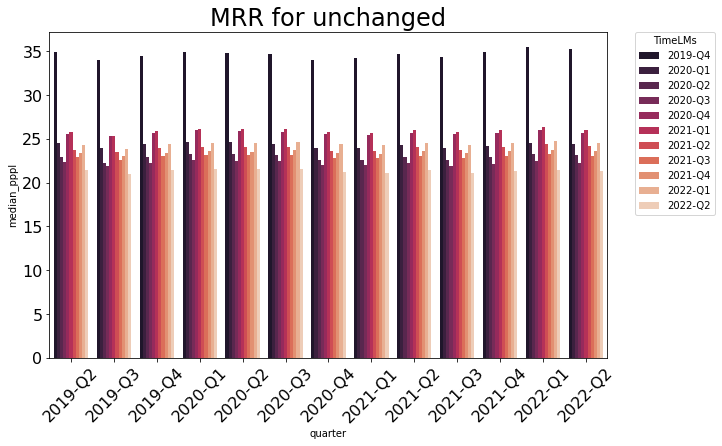

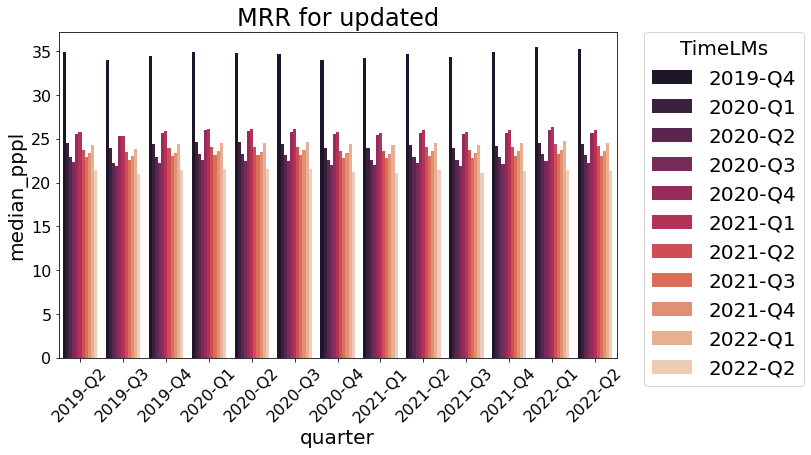

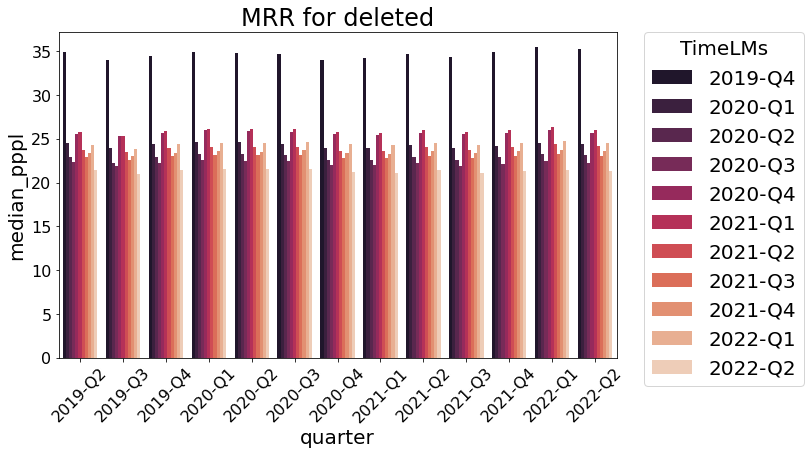

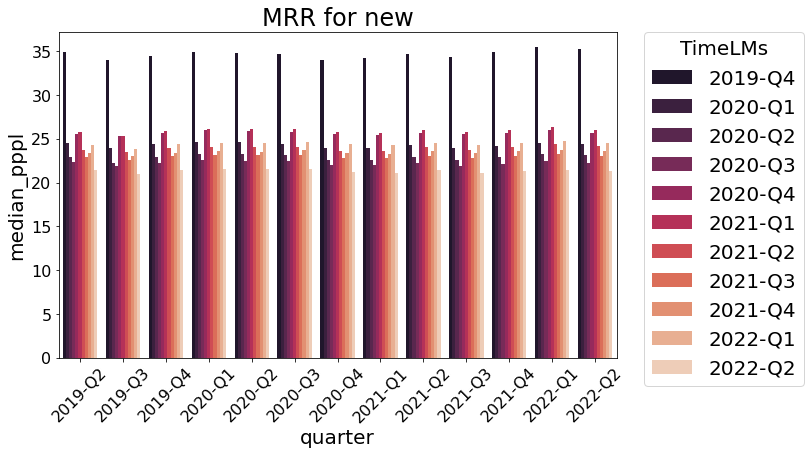

In [14]:
for split in list(set(results_df['split'])):
    _df = results_df[results_df['split']==split]
    fig, axs = plt.subplots(1,1, figsize=(10, 6), sharex=True)
    axs = [axs]
    # sns.barplot(x='year', y="P@1", data=results_df, hue='model', palette="rocket", ax=axs[0])
    sns.barplot(x='quarter', y="median_pppl", data=_df, hue='model', palette="rocket")
    # sns.barplot(x='year', y="P@20", data=results_df, hue='model', palette="rocket", ax=axs[2])
    # sns.barplot(x='year', y="P@50", data=results_df, hue='model', palette="rocket", ax=axs[3])
    # sns.barplot(x='year', y="P@100", data=results_df, hue='model', palette="rocket", ax=axs[4])
    # [ax.get_legend().remove() for ax in axs[:-1]]
    # [ax.set_xlabel("") for ax in axs[:-1]]
    # axs[4].set_xlabel("Test split (year)")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, title='TimeLMs')
    for ax in axs:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.rcParams.update({'font.size': 20})
    plt.xticks(rotation=45)
    plt.title("MRR for {}".format(split))
    plt.savefig('plots/MRR_quarters_all_models_{}.png'.format(split), bbox_inches = 'tight',edgecolor='white',dpi=500)

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(8, 13), sharex=True)
# sns.set_theme(style="ticks")
sns.violinplot(data=results_df, y='mrr', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax0)
sns.violinplot(data=results_df, y='P@1', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
sns.violinplot(data=results_df, y='P@10', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax2)
sns.violinplot(data=results_df, y='P@20', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax3)
plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("TimeLMs")
ax0.set_title('P@k of TimeLMs *on average* across the last 4 years (2019-2022).')
plt.savefig('plots/P@k_avg_time_last4years_quarter.png', bbox_inches = 'tight', dpi=500)

In [ ]:
# boxplot_vis("P@1", last_4_years_df)

In [ ]:
# boxplot_vis("P@10", last_4_years_df)

In [ ]:
# boxplot_vis("P@20", last_4_years_df)

In [ ]:
# boxplot_vis("P@50", last_4_years_df)

In [ ]:
# boxplot_vis("P@100", last_4_years_df)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 4), sharey=True)
sns.lineplot(
    data=results_df,
    x="year", 
    y="P@1",
    hue="model", 
    palette="rocket",
    ax=ax1,
    legend=False
)
ax2.set_ylabel("P@10")
sns.lineplot(
    data=results_df,
    x="year", 
    y="P@10",
    hue="model", 
    palette="rocket",
    ax=ax2,
    legend=False
)
ax3.set_ylabel("mrr")
sns.lineplot(
    data=results_df,
    x="year", 
    y="mrr",
    hue="model", 
    palette="rocket",
    ax=ax3
)
ax3.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0, title='TimeLMs', prop={'size': 12})
for ax in axs:
#     ax.tick_params(bottom='off')
    ax.tick_params(axis='x', rotation=45)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)
#     ax.tick_params(labelrotation=45)
#     for tick in ax.get_xticklabels():
#         tick.set_rotation(45)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.rcParams.update({'font.size': 10})
# plt.xticks(rotation = 45)
plt.xticks(rotation=45)
fig.tight_layout()
plt.savefig('plots/p_over_time_lineplot_quarter.png', bbox_inches = 'tight')

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 13), sharex=True)
# # sns.set_theme(style="ticks")
# sns.violinplot(data=df_all, y='P@1', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
# sns.violinplot(data=df_all, y='P@10', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax2)
# sns.violinplot(data=df_all, y='P@20', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax3)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# ax1.set_xlabel("")
# ax2.set_xlabel("")
# ax3.set_xlabel("TimeLM")
# ax1.set_title('P@k of different models *on average* across all time periods (2010-2022).')
# plt.savefig('plots/P@k_avg_time_allperiods.png', bbox_inches = 'tight', dpi=500)

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(8, 13), sharex=True)
# sns.set_theme(style="ticks")
sns.violinplot(data=results_df, y='mrr', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax0)
sns.violinplot(data=results_df, y='P@1', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
sns.violinplot(data=results_df, y='P@10', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax2)
sns.violinplot(data=results_df, y='P@20', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax3)
plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("TimeLMs")
ax0.set_title('P@k of TimeLMs *on average* across the last 4 years (2019-2022).')
plt.savefig('plots/P@k_avg_time_last4years_quarter.png', bbox_inches = 'tight', dpi=500)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 7), sharex=True)
# # sns.set_theme(style="ticks")
# # sns.violinplot(data=last_4_years_df, y='P@1', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
# sns.violinplot(data=last_4_years_df, y='P@10', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
# sns.violinplot(data=last_4_years_df, y='P@20', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax2)
# plt.xticks(rotation=45)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# # ax1.set_xlabel("")
# # ax2.set_xlabel("")
# # ax3.set_xlabel("TimeLM")
# # ax1.set_title('P@k of different models *on average* for 2018-2022).')
# # ax1.set_title('')
# for ax in axs:
#     for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#         label.set_fontsize(16)
# plt.rcParams.update({'font.size': 20})
# ax1.set_xlabel("")
# ax2.set_xlabel("")
# ax3.set_xlabel("TimeLM")
# ax1.set_title('P@k of different models *on average* for 2018-2022\n')
# # fig.tight_layout()
# plt.savefig('plots/P@k_avg_time_last5years.png', bbox_inches = 'tight', dpi=500)

In [ ]:
results_2_model_df = pd.read_csv(
    os.path.join(RES_DIR, 'timelms_2019-1-1_to_2022-12-31_per_quarter_2019-1-1_to_2022-12-31_per_quarter_single_mask.csv'))

In [ ]:
results_2_model_df[['model', 'year', 'P@10', 'MRR']]